<a href="https://colab.research.google.com/github/epicprogrammer91/NLP_Final_Project/blob/master/Final_NLP_Final_Project_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Final Project
#### Student no. 1: Goldie Srulovich, 204905335
#### Student no. 2: Meti Teka, 204908131
#### Student no. 3: Ben Scholom, 337629398

##### Imports

In [1]:
!pip install cufflinks --upgrade
!pip install  sumy

from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
import networkx
from bokeh.io import output_notebook, show, save

import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import re
import os
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fclusterdata
from sklearn.decomposition import PCA
from textblob import TextBlob
import tensorflow_hub as hub
import random
import math
import glob
import tensorflow as tf
from ast import literal_eval
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21694 sha256=0a32c5f5a91616f075652102c7440b5f105019f5c655c27122a55c72d7e22d5a
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=e1fa8047de7bccb8b403103fc922194f40b6e2c5ba44cdfa0c599c71cea8338e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created

#Extract All Our Previously Generated Summaries

In [2]:
!unzip Generated_Data_prop.zip
!unzip Generated_Data_sentence.zip

Archive:  Generated_Data_prop.zip
  inflating: Generated_Data_prop/prop_generated_summary_1000.csv  
  inflating: Generated_Data_prop/prop_generated_summary_10000.csv  
  inflating: Generated_Data_prop/prop_generated_summary_10200.csv  
  inflating: Generated_Data_prop/prop_generated_summary_10400.csv  
  inflating: Generated_Data_prop/prop_generated_summary_10600.csv  
  inflating: Generated_Data_prop/prop_generated_summary_10800.csv  
  inflating: Generated_Data_prop/prop_generated_summary_11000.csv  
  inflating: Generated_Data_prop/prop_generated_summary_11200.csv  
  inflating: Generated_Data_prop/prop_generated_summary_11400.csv  
  inflating: Generated_Data_prop/prop_generated_summary_11600.csv  
  inflating: Generated_Data_prop/prop_generated_summary_11800.csv  
  inflating: Generated_Data_prop/prop_generated_summary_1200.csv  
  inflating: Generated_Data_prop/prop_generated_summary_12000.csv  
  inflating: Generated_Data_prop/prop_generated_summary_12200.csv  
  inflating: Gen

#Propositions Data

#####Date Loading

In [3]:
#Propositions Data download
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

propositions_df = pd.read_csv("drive/MyDrive/novel_summaries_propositions.csv", encoding='utf-8', index_col=0)

Mounted at /content/drive


#####Data Preprocessing

In [4]:
all_summaries_propositions = []
for t in propositions_df['title'].unique():
  doc_proposition = ". ".join(propositions_df[propositions_df['title']==t]['proposition'].values.tolist())
  all_summaries_propositions.append(doc_proposition)

print('length all_summaries_propositions = ', len(all_summaries_propositions))


length all_summaries_propositions =  16244


#####Data Statistics

In [5]:
avg_propositions_length = 0

for novel in all_summaries_propositions:
  avg_propositions_length += len(novel)

avg_propositions_length /= len(all_summaries_propositions)
print('number of novels = ',len(all_summaries_propositions))
print('Avg novel char length', avg_propositions_length)

number of novels =  16244
Avg novel char length 3345.8906673233196


#Original Novel Summary Data

#####Data loading

In [6]:
# This dataset contains plot summaries for 16,559 books extracted from Wikipedia,
# along with aligned metadata from Freebase, including book author, title, and genre:
# http://www.cs.cmu.edu/~dbamman/booksummaries.html

!tar -xf booksummaries.tar.gz

with open('booksummaries/booksummaries.txt') as f:
    lines = f.readlines()

#####Data Preprocessing

In [7]:
original_text = []
all_novel_titles = []
all_novel_authors = []

for line in lines:
  novel_title = line.split('\t')[2]
  all_novel_titles.append(novel_title)
  novel_author = line.split('\t')[3]
  all_novel_authors.append(novel_author)
  novel_summary = line.split('\t')[-1]
  original_text.append(novel_summary)


#####Data Statistics

In [8]:
all_unique_novel_titles = set(all_novel_titles)
all_unique_novel_authors = set(all_novel_authors)
print('num all_unique_novel_titles', len(all_unique_novel_titles))
print('all_unique_novel_titles', all_unique_novel_titles)
print()
print('all_unique_novel_authors', all_unique_novel_authors)
print('num all_unique_novel_authors', len(all_unique_novel_authors))

num all_unique_novel_titles 16277
all_unique_novel_titles {'Islandia', 'The Armies of Memory', "City at World's End", "F.P.1 Doesn't Respond", 'Leven Thumps and the Eyes of The Want', 'Woodsong', 'With Red Hands', 'The Romance of the Forest', 'Le Silence de la mer', 'Romance of Two Worlds', 'Variable Star', 'Macrolife', 'The Arabian Nights Murder', 'Delirium (Cooper novel)', 'Gone-Away Lake', 'November', 'The Crucible of Time', 'Tortilla Flat', 'Bud, Not Buddy', 'The Dain Curse', 'La Curée', 'The Magic School Bus Lost in the Solar System', 'Arrow to the Sun', 'The Divine Folly', 'All The Beautiful Sinners', 'Beginning with a Bash', 'Royal Escape', "Isaac Asimov's Robot City: Perihelion", 'Landscape for a Good Woman', 'Joey Pigza Swallowed the Key', 'The Beasts of Clawstone Castle', 'The Rainbird Pattern', 'Mildred Pierce', 'The Ends of the Earth', 'On Parole', 'Chance and Necessity', 'Turnabout', 'Jack & Jill', 'Tom Swift in the Caves of Ice', 'England, Their England', 'They Do It with

In [9]:
avg_novel_length = 0

for novel in lines:
  avg_novel_length += len(novel)

avg_novel_length /= len(lines)
print('number of novels = ',len(lines))
print('Avg novel char length', avg_novel_length)

number of novels =  16559
Avg novel char length 2621.172655353584


#Graph Summarization Algorithm

##### Sentence Tokenization

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')

def read_document(text):
    all_sentences =[]
    all_sentences = sent_tokenize(text)
    for sentence in all_sentences:
        sentence.replace("[^a-zA-Z0-9]"," ")
    return all_sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index


#####Sentence Similarity

In [11]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def sentence_similarity(sent1,sent2,embed):
    A = embed([sent1])[0]
    B = embed([sent2])[0]
    return 1 - (np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B)))

#####Computing Similarity Matrix

In [12]:
def build_similarity_matrix(sentences,embeds):
    similarity_matrix = np.zeros((len(sentences),len(sentences)))
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1!=idx2:
              if similarity_matrix[idx2][idx1] != 0:
                similarity_matrix[idx1][idx2] = similarity_matrix[idx2][idx1]
              else:
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1],sentences[idx2],embeds)
    return similarity_matrix

#####Sentence Summarization

In [13]:
def generate_summary(text,n,embeds):
    summarize_text = []
    sentences = read_document(text)
    sim_matrix = build_similarity_matrix(sentences,embeds)
    graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(graph)
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)
    for i in range(n):
        if i < len(ranked_sentences):
          summarize_text.append(ranked_sentences[i][1])
    return " ".join(summarize_text), sim_matrix

In [14]:
def generate_all_summaries(original_text, rand_indices, num_articles=200, data_type='sentence', performace_task = False):

  NUM_SUMMARIES_ = 1000

  BEGINNING_INDEX = 0 #num_articles - 50

  folder_name = './Generated_Data_'+data_type+'/'

  if os.path.isdir(folder_name) and not performace_task:

    path = folder_name
    all_files = glob.glob(os.path.join(path, "*.csv")) #"/*.csv"
    #print('all_files', all_files)
    li = []

    for filename in all_files:
      df = pd.read_csv(filename, index_col=None, header=0)
      li.append(df)
      #print(filename, li)

    frame = pd.concat(li, axis=0, ignore_index=True)

    frame = frame.sort_values('Index')
    print(frame)

    all_generated_summaries = frame['Generate Summary'].tolist()[:NUM_SUMMARIES_]

    all_embeddings = np.array(frame['Embedding'])

    all_embeddings_final = []


    for e in all_embeddings:
      list_ = literal_eval(e)
      array = np.array(list_)
      all_embeddings_final.append(array)

    all_embeddings_final = all_embeddings_final[:NUM_SUMMARIES_]

    return all_generated_summaries, all_embeddings_final, None


  elif not performace_task:
    os.makedirs(folder_name)


  all_articles = original_text

  all_sim_matrices = []
  all_generated_summaries = []
  all_indices = []
  avg_summary_length = 0
  all_embeddings = []
  all_rand_articles = [all_articles[i] for i in rand_indices]

  counter = BEGINNING_INDEX

  write_batch_size = 200
  next_write_index = 0

  for article in all_rand_articles[counter:]:
    print("Finished generating summary #",counter)
    sent_tok = read_document(article)
    mod_sent = sent_tok
    Original_Text = " ".join(mod_sent)
    Summarized_Text, sim_matrix = generate_summary(Original_Text, n=5, embeds=embed)
    all_sim_matrices.append(sim_matrix)
    all_generated_summaries.append(Summarized_Text)
    all_indices.append(counter)
    avg_summary_length += len(Summarized_Text)
    A = embed([Summarized_Text])[0]
    all_embeddings.append(A.numpy().tolist())
    #print(counter)
    counter += 1


    if not performace_task and (counter % write_batch_size == 0 or (num_articles - counter) == 0):
      indices_series = pd.Series(all_indices[next_write_index:], name='Index')
      summaries_series = pd.Series(all_generated_summaries[next_write_index:], name='Generate Summary')
      embeddings_series = pd.Series(all_embeddings[next_write_index:], name='Embedding')

      df_summary_embedding=pd.concat([indices_series, summaries_series,embeddings_series],axis=1)

      file_name = data_type + '_generated_summary_' + str(counter) + '.csv'
      df_summary_embedding.to_csv(folder_name+file_name, encoding='utf-8')

      next_write_index = counter - BEGINNING_INDEX


  avg_summary_length /= len(all_generated_summaries)
  print('Avg summary char length', avg_summary_length)

  all_embeddings_final = []
  for e in all_embeddings:
    e = np.array(e)
    all_embeddings_final.append(e)

  return all_generated_summaries, all_embeddings_final, all_sim_matrices

#Evaluation Method

#####Bleu Score

In [15]:
def generate_BLEUscores(all_generated_summaries):

  scores = np.zeros((len(all_generated_summaries),len(all_generated_summaries)))
  evaluated_pairs = set()

  for s_a in range(len(all_generated_summaries)):
    print(s_a)
    for s_b in range(len(all_generated_summaries)):

      if str((s_b,s_a)) in evaluated_pairs:
        #print("found", str((s_b,s_a)))
        scores[s_a][s_b] = scores[s_b][s_a]
        continue

      s1 = all_generated_summaries[s_a]
      s2 = all_generated_summaries[s_b]

      hypothesis = s1
      reference = s2
      try:
        BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
      except:
        print('s1', s1)
        print('s2', s2)
        BLEUscore = 0
      #print(f"BLEUscore : {BLEUscore}")

      scores[s_a][s_b] = BLEUscore
      evaluated_pairs.add(str((s_a,s_b)))
      #print(s_a,s_b)

  return scores

def generate_BLEUscores_matrix(all_generated_summaries):
  BLEUscores_matrix = generate_BLEUscores(all_generated_summaries)
  print('In order to ignore identical document pairing scores (e.g. indices (3,3)), which will produce max possible BLEU score\n'\
  'we assign identical indices a score value of 0. BLEUscores_matrix after modification:')

  for i in range(BLEUscores_matrix.shape[0]):
    BLEUscores_matrix[i][i] = 0
  print(BLEUscores_matrix)
  return BLEUscores_matrix

#Text Data Recommendation Engine Algorithms (3 in total)

## (1) PCA + Clustering Summary Embeddings

#####Hierarchical Clustering Hyperparameter Tuning Using Validation Set

In [16]:
def PCA_clustering_hyperparameter_turning(all_embeddings, BLEUscores_matrix, num_total_summaries=200):

  num_summaries_validation = math.ceil(num_total_summaries * 0.05)
  if num_summaries_validation < 100:
    num_summaries_validation = 100
    num_summaries_validation = min([num_summaries_validation, num_total_summaries])

  rand_indices_validation = random.sample(range(num_total_summaries), num_summaries_validation)
  all_rand_embeddings = [all_embeddings[i] for i in rand_indices_validation]


  PCA_dimensions = [2,4,6,8,10,20,40,60,80,100,200,300,400]
  threshold_values = [0.2,0.4,0.6,0.8,1.0,1.5,2.0,2.5,3.0]
  distance_metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

  all_avg_BLEUScores = {}
  #Process Data
  all_np_embeddings = []
  for e in all_rand_embeddings:
    #print('e',e)
    if not isinstance(e, np.ndarray):
      e = e.numpy()
    all_np_embeddings.append(e)

  all_np_embeddings = np.array(all_np_embeddings)
  data = all_np_embeddings

  for d in PCA_dimensions:
    for t in threshold_values:
      for dist in distance_metrics:
        pca = PCA(d)
        #Transform the data
        try:
          df_PCA = pca.fit_transform(data)
        except:
          continue

        try:
          label = fclusterdata(df_PCA, t=t, criterion='distance', metric=dist)
        except:
          continue

        all_labels_summaries = {}
        for i in range(len(label)):
          if label[i] not in all_labels_summaries:
            all_labels_summaries[label[i]] = []
          all_labels_summaries[label[i]].append(i)

        avg_BLEUScore = 0
        num_indx_total = 0
        for key in all_labels_summaries:

          for i in all_labels_summaries[key]:
            for j in all_labels_summaries[key]:
              if i == j:
                continue
              avg_BLEUScore += BLEUscores_matrix[i][j]
              num_indx_total += 1

        avg_BLEUScore /= num_indx_total
        all_avg_BLEUScores[(d, t, dist)] = avg_BLEUScore


        label = list(set(label))
        cluster_sizes = []
        max_cluster_size = 0
        max_cluster_label = None
        for i in range(len(label)):
            cluster_size = len(all_labels_summaries[label[i]])
            cluster_sizes.append(cluster_size)
            if cluster_size > max_cluster_size:
                max_cluster_size = cluster_size
                max_cluster_label = label[i]

        heatmap_cluster_elements = all_labels_summaries[max_cluster_label]
        cluster_BLEUScores = np.zeros((len(heatmap_cluster_elements), len(heatmap_cluster_elements)))

        index_i = 0
        #index_j = 0
        for i in all_labels_summaries[max_cluster_label]:
            index_j = 0
            for j in all_labels_summaries[max_cluster_label]:
                if index_i == index_j:
                  cluster_BLEUScores[index_i][index_j] = 1
                else:
                  cluster_BLEUScores[index_i][index_j] = BLEUscores_matrix[i][j]
                index_j += 1
            index_i += 1


        p1 = sns.heatmap(cluster_BLEUScores)

        return all_avg_BLEUScores


In [17]:
# Get Optimal Hyperparameters from Above Experiement Using BLEUScore...
def get_optimal_hyperparameters(all_embeddings, BLEUscores_matrix, num_all_generated_summaries):

  all_avg_BLEUScores = PCA_clustering_hyperparameter_turning(all_embeddings, BLEUscores_matrix, num_total_summaries=num_all_generated_summaries)

  max_avg_BLEUScore_Clustering = 0
  max_avg_BLEUScore_Clustering_key = None
  for key in all_avg_BLEUScores:
    if all_avg_BLEUScores[key] > max_avg_BLEUScore_Clustering:
      max_avg_BLEUScore_Clustering_key = key
      max_avg_BLEUScore_Clustering = all_avg_BLEUScores[key]

  print('Most Optimal Hyperparameters We Will Use:')
  print()
  print('('+'PCA_dimension, '+'threshold_value, '+'distance_metric'+') : ', max_avg_BLEUScore_Clustering_key)
  print('max_avg_BLEUScore_Clustering =', max_avg_BLEUScore_Clustering)

  return max_avg_BLEUScore_Clustering_key, max_avg_BLEUScore_Clustering


In [18]:
# finds all indices of given element inside numpy array
def ind(array, item):
	indices = []
	for idx, val in np.ndenumerate(array):
	  if val == item:
	    indices.extend(idx)

	return indices

In [19]:
def apply_clustering(all_embeddings, BLEUscores_matrix, PCA_dimension, threshold_value, distance_metric):

  #Process Data
  all_np_embeddings = []
  for e in all_embeddings:
    if not isinstance(e, np.ndarray):
      e = e.numpy()
    all_np_embeddings.append(e)
  all_np_embeddings = np.array(all_np_embeddings)
  data = all_np_embeddings

  #Perform PCA and Heirarchtical Clustering using optimal hyperparameters
  pca = PCA(PCA_dimension)
  #Transform the data
  df_PCA = pca.fit_transform(data)
  #Cluster
  label = fclusterdata(df_PCA, t=threshold_value, criterion='distance', metric=distance_metric)
  label = np.array(label)

  max_cluster_num = label.max()
  min_cluster_num = label.min()

  #Compute Resulting BLEUScores
  print('BLEUScores for Heirarchtical Clustering:\n')
  min_BLEUScore_clustering = 1
  max_BLEUScore_clustering = 0
  max_BLEUScore_clustering_pair = None
  avg_BLEUScore_clustering = 0
  num_indx_total_clustering = 0

  for cluster_num in range(min_cluster_num, max_cluster_num + 1):
    all_members = ind(label, cluster_num)
    for i in range(len(all_members)):
      for j in range(len(all_members)):
        if i == j:
          continue
        num_indx_total_clustering += 1
        avg_BLEUScore_clustering += BLEUscores_matrix[i][j]

        if BLEUscores_matrix[i][j] < min_BLEUScore_clustering:
          min_BLEUScore_clustering = BLEUscores_matrix[i][j]

        if BLEUscores_matrix[i][j] > max_BLEUScore_clustering:
          max_BLEUScore_clustering = BLEUscores_matrix[i][j]
          max_BLEUScore_clustering_pair = (i,j)



  avg_BLEUScore_clustering /= num_indx_total_clustering

  print('avg_BLEUScore_clustering',avg_BLEUScore_clustering)
  print('min_BLEUScore_clustering',min_BLEUScore_clustering)
  print('max_BLEUScore_clustering',max_BLEUScore_clustering)
  print('max_BLEUScore_clustering_pair',max_BLEUScore_clustering_pair)
  print('num_indx_total_clustering',num_indx_total_clustering)

  return avg_BLEUScore_clustering, min_BLEUScore_clustering, max_BLEUScore_clustering, max_BLEUScore_clustering_pair, num_indx_total_clustering


###Text Similarity/Plagiarism Detection Algorithms

#####(2) Trigram

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

def preprocessing_step(orig, plag):
  #word tokenisation
  tokens_o=word_tokenize(orig)
  tokens_p=word_tokenize(plag)

  #lowerCase
  tokens_o = [token.lower() for token in tokens_o]
  tokens_p = [token.lower() for token in tokens_p]

  #stop word removal
  #punctuation removal
  stop_words=set(stopwords.words('english'))
  punctuations=['"','.','(',')',',','?',';',':',"''",'``']
  filtered_tokens_o = [w for w in tokens_o if not w in stop_words and not w in punctuations]
  filtered_tokens_p = [w for w in tokens_p if not w in stop_words and not w in punctuations]

  return filtered_tokens_o, filtered_tokens_p


def get_containment_measures(all_generated_summaries):
  containment_measures = np.zeros((len(all_generated_summaries),len(all_generated_summaries)))
  evaluated_pairs = set()

  for s_a in range(len(all_generated_summaries)):
    print(s_a)
    for s_b in range(len(all_generated_summaries)):

      if str((s_b,s_a)) in evaluated_pairs:
        #print("found", str((s_b,s_a)))
        containment_measures[s_a][s_b] = containment_measures[s_b][s_a]
        continue

      s1 = all_generated_summaries[s_a]
      s2 = all_generated_summaries[s_b]

      tokens_o, tokens_p = preprocessing_step(s1, s2)

      #Trigram Similiarity measures
      trigrams_o=[]
      for i in range(len(tokens_o)-2):
          t=(tokens_o[i],tokens_o[i+1],tokens_o[i+2])
          trigrams_o.append(t)

      s=0
      trigrams_p=[]
      for i in range(len(tokens_p)-2):
          t=(tokens_p[i],tokens_p[i+1],tokens_p[i+2])
          trigrams_p.append(t)
          if t in trigrams_o:
              s+=1

      #containment measure
      try:
        C=s/len(trigrams_p)
      except:
        containment_measures[s_a][s_b] = 0
      containment_measures[s_a][s_b] = C

      evaluated_pairs.add(str((s_a,s_b)))
      #print('added ', str((s_a,s_b)))
      #print(evaluated_pairs)

  return containment_measures

def generate_containment_measures_matrix(all_generated_summaries):
  containment_measures_matrix = get_containment_measures(all_generated_summaries)

  print('In order to ignore identical document pairing scores (e.g. indices (3,3)), which will produce a max possible containment measure score of 1\n'\
  'we assign identical indices a score value of 0. containment_measures_matrix after modification:')

  for i in range(containment_measures_matrix.shape[0]):
    containment_measures_matrix[i][i] = 0
  print(containment_measures_matrix)
  return containment_measures_matrix

In [21]:
#Compute Resulting BLEUScores
def compute_BLEUScores_Trigram(containment_measures_matrix, BLEUscores_matrix):
  print('BLEUScores for Trigram:\n')
  all_matching_pairs = np.argmax(containment_measures_matrix, axis=1)

  min_BLEUScore_Trigram = 1
  max_BLEUScore_Trigram = 0
  max_BLEUScore_Trigram_pair = None
  avg_BLEUScore_Trigram = 0
  num_indx_total_Trigram = 0

  for i in range(len(all_matching_pairs)):
      avg_BLEUScore_Trigram += BLEUscores_matrix[i][all_matching_pairs[i]]
      num_indx_total_Trigram += 1

      if BLEUscores_matrix[i][all_matching_pairs[i]] < min_BLEUScore_Trigram and i != all_matching_pairs[i]:
        min_BLEUScore_Trigram = BLEUscores_matrix[i][all_matching_pairs[i]]

      if BLEUscores_matrix[i][all_matching_pairs[i]] > max_BLEUScore_Trigram:
        max_BLEUScore_Trigram = BLEUscores_matrix[i][all_matching_pairs[i]]
        max_BLEUScore_Trigram_pair = (i,all_matching_pairs[i])

  avg_BLEUScore_Trigram /= num_indx_total_Trigram
  print('avg_BLEUScore_Trigram',avg_BLEUScore_Trigram)
  print('min_BLEUScore_Trigram',min_BLEUScore_Trigram)
  print('max_BLEUScore_Trigram',max_BLEUScore_Trigram)
  print('max_BLEUScore_Trigram_pair', max_BLEUScore_Trigram_pair)
  print('num_indx_total_Trigram',num_indx_total_Trigram)

  return avg_BLEUScore_Trigram, min_BLEUScore_Trigram, max_BLEUScore_Trigram, max_BLEUScore_Trigram_pair, num_indx_total_Trigram


#####(3) LCS

In [22]:
#longest common subsequence
#dynamic programming algorithm for finding lcs
def lcs(l1,l2):
    s1=word_tokenize(l1)
    s2=word_tokenize(l2)
    # storing the dp values
    dp = [[None]*(len(s1)+1) for i in range(len(s2)+1)]

    for i in range(len(s2)+1):
        for j in range(len(s1)+1):
            if i == 0 or j == 0:
                dp[i][j] = 0
            elif s2[i-1] == s1[j-1]:
                dp[i][j] = dp[i-1][j-1]+1
            else:
                dp[i][j] = max(dp[i-1][j] , dp[i][j-1])
    return dp[len(s2)][len(s1)]

In [23]:
def process_documents_using_lcs(all_generated_summaries):

  scores = np.zeros((len(all_generated_summaries),len(all_generated_summaries)))
  evaluated_pairs = set()

  for s_a in range(len(all_generated_summaries)):
    print(s_a)
    for s_b in range(len(all_generated_summaries)):

      if str((s_b,s_a)) in evaluated_pairs:
        #print('found ', str((s_b,s_a)))
        scores[s_a][s_b] = scores[s_b][s_a]
        continue

      s1 = all_generated_summaries[s_a]
      s2 = all_generated_summaries[s_b]

      tokens_o, tokens_p = preprocessing_step(s1, s2)

      sent_o=sent_tokenize(s1)
      sent_p=sent_tokenize(s2)

      #maximum length of LCS for a sentence in suspicious text
      max_lcs=0
      sum_lcs=0

      for i in sent_p:
          for j in sent_o:
              l=lcs(i,j)
              max_lcs=max(max_lcs,l)
          sum_lcs+=max_lcs
          max_lcs=0

      score=sum_lcs/len(tokens_p)
      scores[s_a][s_b] = score

      evaluated_pairs.add(str((s_a,s_b)))
      #print('added ', str((s_a,s_b)))
      #print(evaluated_pairs)

  return scores

def compute_lcs_scores_matrix(all_generated_summaries):
  lcs_scores_matrix = process_documents_using_lcs(all_generated_summaries)

  print('In order to ignore identical document pairing scores (e.g. indices (3,3)), which will produce a max possible LCS score\n'\
  'we assign identical indices a score value of 0. lcs_scores_matrix after modification:')
  for i in range(lcs_scores_matrix.shape[0]):
    lcs_scores_matrix[i][i] = 0
  print(lcs_scores_matrix)
  return lcs_scores_matrix

In [24]:
#Compute Resulting BLEUScores
def compute_BLEUScores_LCS(lcs_scores_matrix, BLEUscores_matrix):
  print('BLEUScores for LCS:\n')
  all_matching_pairs = np.argmax(lcs_scores_matrix, axis=1)

  min_BLEUScore_LCS = 1
  max_BLEUScore_LCS = 0
  max_BLEUScore_LCS_pair = None
  avg_BLEUScore_LCS = 0
  num_indx_total_LCS = 0

  for i in range(len(all_matching_pairs)):
      avg_BLEUScore_LCS += BLEUscores_matrix[i][all_matching_pairs[i]]
      num_indx_total_LCS += 1

      if BLEUscores_matrix[i][all_matching_pairs[i]] < min_BLEUScore_LCS and i != all_matching_pairs[i]:
        min_BLEUScore_LCS = BLEUscores_matrix[i][all_matching_pairs[i]]

      if BLEUscores_matrix[i][all_matching_pairs[i]] > max_BLEUScore_LCS:
        max_BLEUScore_LCS = BLEUscores_matrix[i][all_matching_pairs[i]]
        max_BLEUScore_LCS_pair = (i, all_matching_pairs[i])

  avg_BLEUScore_LCS /= num_indx_total_LCS
  print('avg_BLEUScore_LCS',avg_BLEUScore_LCS)
  print('min_BLEUScore_LCS',min_BLEUScore_LCS)
  print('max_BLEUScore_LCS',max_BLEUScore_LCS)
  print('max_BLEUScore_LCS_pair', max_BLEUScore_LCS_pair)
  print('num_indx_total_LCS',num_indx_total_LCS)

  return avg_BLEUScore_LCS, min_BLEUScore_LCS, max_BLEUScore_LCS, max_BLEUScore_LCS_pair, num_indx_total_LCS

#Experiment Execution

In [25]:
num_total_articles = 1000#min([len(original_text), len(all_summaries_propositions)])
num_articles = num_total_articles
rand_indices = list(range(num_total_articles))#random.sample(range(num_total_articles), num_articles)
print(rand_indices)
print(len(rand_indices))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

##### Sentence-Level Summarization Results

      Unnamed: 0  Index                                   Generate Summary  \
6844           0      0  Squealer reports that the van was purchased by...   
6845           1      1  Following an unexpected visit from P.R. During...   
6846           2      2  He is arrested. Official notices enacting cont...   
6847           3      3  it may be replied in one word, experience. No....   
6848           4      4  The next layer, the "Slow Zone", is roughly eq...   
...          ...    ...                                                ...   
6639          39  16239   The novel is narrated by the 89 year old Lily...   
6640          40  16240  He falls in love with Tim's sister and the thr...   
6641          41  16241  Whilst wandering the halls of the Palace, Wend...   
6642          42  16242   The story concerns three college friends from...   
6643          43  16243   The droplets of H20 have turned to icy crysta...   

                                              Embedding  
6844 

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()



4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

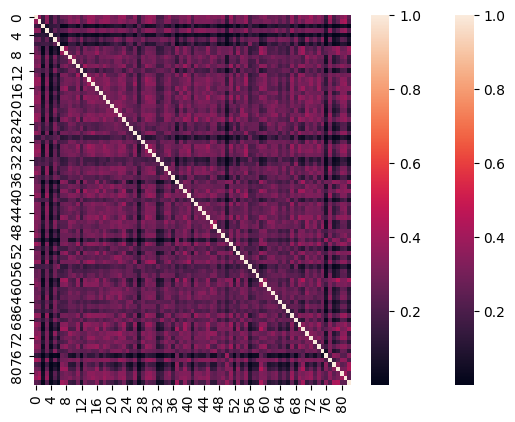

In [26]:
#Generate all summaries:
all_generated_summaries, all_embeddings, _ = generate_all_summaries(original_text, rand_indices, num_articles=num_articles)

BLEUscores_matrix = generate_BLEUscores_matrix(all_generated_summaries)


#Clustering:
all_avg_BLEUScores = PCA_clustering_hyperparameter_turning(all_embeddings, BLEUscores_matrix, num_total_summaries=len(all_generated_summaries))

max_avg_BLEUScore_Clustering_key, max_avg_BLEUScore_Clustering = get_optimal_hyperparameters(all_embeddings, BLEUscores_matrix, num_all_generated_summaries=len(all_generated_summaries))

PCA_dimension, threshold_value, distance_metric = max_avg_BLEUScore_Clustering_key

avg_BLEUScore_clustering, min_BLEUScore_clustering, max_BLEUScore_clustering, max_BLEUScore_clustering_pair, num_indx_total_clustering = apply_clustering(all_embeddings, BLEUscores_matrix, PCA_dimension, threshold_value, distance_metric)


#Trigram:
containment_measures_matrix = generate_containment_measures_matrix(all_generated_summaries)

avg_BLEUScore_Trigram, min_BLEUScore_Trigram, max_BLEUScore_Trigram, max_BLEUScore_Trigram_pair, num_indx_total_Trigram = compute_BLEUScores_Trigram(containment_measures_matrix, BLEUscores_matrix)

#LCS:
lcs_scores_matrix = compute_lcs_scores_matrix(all_generated_summaries)
avg_BLEUScore_LCS, min_BLEUScore_LCS, max_BLEUScore_LCS, max_BLEUScore_LCS_pair, num_indx_total_LCS = compute_BLEUScores_LCS(lcs_scores_matrix, BLEUscores_matrix)



##### Proposition-Level Summarization Results

      Unnamed: 0  Index                                   Generate Summary  \
400            0      0  an actual philosophy formally name Animalism. ...   
401            1      1  it is revealed that During this sequence. The ...   
402            2      2  Authorities M. including the Prefect. Official...   
403            3      3  he mentions the operations of mixing , separat...   
404            4      4  The next layer is roughly equivalent to the re...   
...          ...    ...                                                ...   
4039          39  16239  A long , cold winter coupled with political di...   
4040          40  16240  He is in South America only to be killed by Ra...   
4041          41  16241  He illustrates this point He this by explainin...   
4042          42  16242  Colbert addresses topics including Wall Street...   
4043          43  16243  Dobroselova announces that a Mr. Dobroselova o...   

                                              Embedding  
400  

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()



1
2
3
4
5


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()



6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
28

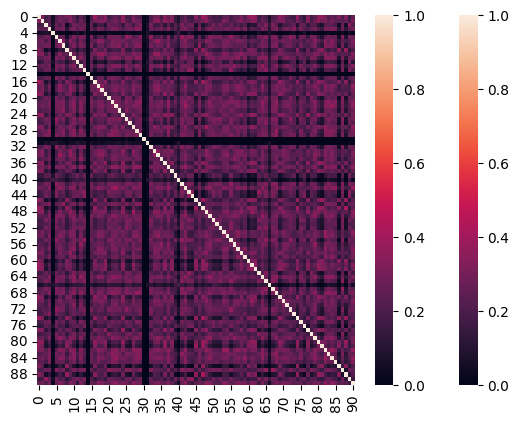

In [27]:
#Generate all summaries:
all_generated_summaries_prop, all_embeddings_prop, _ = generate_all_summaries(all_summaries_propositions, rand_indices, num_articles=num_articles, data_type='prop')

BLEUscores_matrix_prop = generate_BLEUscores_matrix(all_generated_summaries_prop)


#Clustering:
all_avg_BLEUScores_prop = PCA_clustering_hyperparameter_turning(all_embeddings_prop, BLEUscores_matrix_prop, num_total_summaries=len(all_generated_summaries_prop))

max_avg_BLEUScore_Clustering_key_prop, max_avg_BLEUScore_Clustering_prop = get_optimal_hyperparameters(all_embeddings_prop, BLEUscores_matrix_prop, num_all_generated_summaries=len(all_generated_summaries_prop))

PCA_dimension_prop, threshold_value_prop, distance_metric_prop = max_avg_BLEUScore_Clustering_key_prop

avg_BLEUScore_clustering_prop, min_BLEUScore_clustering_prop, max_BLEUScore_clustering_prop, max_BLEUScore_clustering_pair_prop, num_indx_total_clustering_prop = apply_clustering(all_embeddings_prop, BLEUscores_matrix_prop, PCA_dimension_prop, threshold_value_prop, distance_metric_prop)


#Trigram:
containment_measures_matrix_prop = generate_containment_measures_matrix(all_generated_summaries_prop)

avg_BLEUScore_Trigram_prop, min_BLEUScore_Trigram_prop, max_BLEUScore_Trigram_prop, max_BLEUScore_Trigram_pair_prop, num_indx_total_Trigram_prop = compute_BLEUScores_Trigram(containment_measures_matrix_prop, BLEUscores_matrix_prop)

#LCS:
lcs_scores_matrix_prop = compute_lcs_scores_matrix(all_generated_summaries_prop)
avg_BLEUScore_LCS_prop, min_BLEUScore_LCS_prop, max_BLEUScore_LCS_prop, max_BLEUScore_LCS_pair_prop, num_indx_total_LCS_prop = compute_BLEUScores_LCS(lcs_scores_matrix_prop, BLEUscores_matrix_prop)



# Results and Conclusions

#####Summarization With Summy

In [28]:
def summarize_with_sumy(Original_Text):

  parser = PlaintextParser.from_string(Original_Text,Tokenizer("english"))
  summarizer = LexRankSummarizer()
  #Summarize the document with 5 sentences
  summary = summarizer(parser.document, 5)

  summary_sentences = ""
  for sentence in summary:
      summary_sentences = summary_sentences + str(sentence) + "\n"

  return summary_sentences



#Top Sentence-Level matches vs Sumy BLEUScores

all_indices_to_summarize_with_summy = []
all_indices_to_summarize_with_summy.extend(max_BLEUScore_clustering_pair)
all_indices_to_summarize_with_summy.extend(max_BLEUScore_Trigram_pair)
all_indices_to_summarize_with_summy.extend(max_BLEUScore_LCS_pair)

all_sumy_summaries = {}
all_sumy_summaries_list = []
all_sumy_summaries_BLEUScore = {}
for i in all_indices_to_summarize_with_summy:
  original_indx = rand_indices[i]
  original = original_text[original_indx]
  sumy_summary = summarize_with_sumy(original)
  all_sumy_summaries[i] = sumy_summary
  all_sumy_summaries_list.append(sumy_summary)


BLEUscores_sumy_matrix = generate_BLEUscores(all_sumy_summaries_list)

for i in range(BLEUscores_sumy_matrix.shape[0]):
  BLEUscores_sumy_matrix[i][i] = 0
print(BLEUscores_sumy_matrix)
print(BLEUscores_sumy_matrix.shape)


sumy_BLEUScores = {}
sumy_BLEUScores[max_BLEUScore_clustering_pair] = BLEUscores_sumy_matrix[0][1]
sumy_BLEUScores[max_BLEUScore_Trigram_pair] = BLEUscores_sumy_matrix[2][3]
sumy_BLEUScores[max_BLEUScore_LCS_pair] = BLEUscores_sumy_matrix[4][5]


#Top Proposition-Level matches vs Sumy BLEUScores

all_indices_to_summarize_with_summy = []
all_indices_to_summarize_with_summy.extend(max_BLEUScore_clustering_pair_prop)
all_indices_to_summarize_with_summy.extend(max_BLEUScore_Trigram_pair_prop)
all_indices_to_summarize_with_summy.extend(max_BLEUScore_LCS_pair_prop)

all_sumy_summaries_prop = {}
all_sumy_summaries_list_prop = []
all_sumy_summaries_BLEUScore = {}
for i in all_indices_to_summarize_with_summy:
  original_indx = rand_indices[i]
  original = all_summaries_propositions[original_indx]
  sumy_summary = summarize_with_sumy(original)
  all_sumy_summaries_prop[i] = sumy_summary
  all_sumy_summaries_list_prop.append(sumy_summary)


BLEUscores_sumy_matrix_prop = generate_BLEUscores(all_sumy_summaries_list_prop)

for i in range(BLEUscores_sumy_matrix_prop.shape[0]):
  BLEUscores_sumy_matrix_prop[i][i] = 0
print(BLEUscores_sumy_matrix_prop)
print(BLEUscores_sumy_matrix_prop.shape)


sumy_BLEUScores_prop = {}
sumy_BLEUScores_prop[max_BLEUScore_clustering_pair_prop] = BLEUscores_sumy_matrix_prop[0][1]
sumy_BLEUScores_prop[max_BLEUScore_Trigram_pair_prop] = BLEUscores_sumy_matrix_prop[2][3]
sumy_BLEUScores_prop[max_BLEUScore_LCS_pair_prop] = BLEUscores_sumy_matrix_prop[4][5]

0
1
2
3
4
5
[[0.         0.47819779 0.18338623 0.23551182 0.28075212 0.35886824]
 [0.47819779 0.         0.16021854 0.20185887 0.25256723 0.33588544]
 [0.18338623 0.16021854 0.         0.283068   0.27159727 0.18959684]
 [0.23551182 0.20185887 0.283068   0.         0.35602416 0.25689619]
 [0.28075212 0.25256723 0.27159727 0.35602416 0.         0.34837496]
 [0.35886824 0.33588544 0.18959684 0.25689619 0.34837496 0.        ]]
(6, 6)
0
1
2
3
4
5
[[0.         0.64971935 1.         0.64971935 1.         0.64971935]
 [0.64971935 0.         0.62336141 1.         0.62336141 1.        ]
 [1.         0.62336141 0.         0.64971935 1.         0.64971935]
 [0.64971935 1.         0.64971935 0.         0.62336141 1.        ]
 [1.         0.62336141 1.         0.62336141 0.         0.64971935]
 [0.64971935 1.         0.64971935 1.         0.64971935 0.        ]]
(6, 6)


#####Top Novel Matches - Original Text BLEUScores (w/o summarization)

In [29]:
#Top Sentence-Level matches vs Original Text BLEUScores

all_indices_original = []
all_indices_original.extend(max_BLEUScore_clustering_pair)
all_indices_original.extend(max_BLEUScore_Trigram_pair)
all_indices_original.extend(max_BLEUScore_LCS_pair)

all_original_summaries = {}
all_original_summaries_list = []
all_original_summaries_BLEUScore = {}
for i in all_indices_original:
  original_indx = rand_indices[i]
  original = original_text[original_indx]
  #sumy_summary = summarize_with_sumy(original)
  all_original_summaries[i] = original
  all_original_summaries_list.append(original)


BLEUscores_original_matrix = generate_BLEUscores(all_original_summaries_list)

for i in range(BLEUscores_original_matrix.shape[0]):
  BLEUscores_original_matrix[i][i] = 0
print(BLEUscores_original_matrix)
print(BLEUscores_original_matrix.shape)


original_BLEUScores = {}
original_BLEUScores[max_BLEUScore_clustering_pair] = BLEUscores_original_matrix[0][1]
original_BLEUScores[max_BLEUScore_Trigram_pair] = BLEUscores_original_matrix[2][3]
original_BLEUScores[max_BLEUScore_LCS_pair] = BLEUscores_original_matrix[4][5]


#Top Proposition-Level matches vs Original Text BLEUScores

all_indices_original = []
all_indices_original.extend(max_BLEUScore_clustering_pair_prop)
all_indices_original.extend(max_BLEUScore_Trigram_pair_prop)
all_indices_original.extend(max_BLEUScore_LCS_pair_prop)

all_original_summaries_prop = {}
all_original_summaries_list_prop = []
all_original_summaries_BLEUScore_prop = {}
for i in all_indices_original:
  original_indx = rand_indices[i]
  original = all_summaries_propositions[original_indx]
  #sumy_summary = summarize_with_sumy(original)
  all_original_summaries_prop[i] = original
  all_original_summaries_list_prop.append(original)


BLEUscores_original_matrix_prop = generate_BLEUscores(all_original_summaries_list_prop)

for i in range(BLEUscores_original_matrix_prop.shape[0]):
  BLEUscores_original_matrix_prop[i][i] = 0
print(BLEUscores_original_matrix_prop)
print(BLEUscores_original_matrix_prop.shape)


original_BLEUScores_prop = {}
original_BLEUScores_prop[max_BLEUScore_clustering_pair_prop] = BLEUscores_original_matrix_prop[0][1]
original_BLEUScores_prop[max_BLEUScore_Trigram_pair_prop] = BLEUscores_original_matrix_prop[2][3]
original_BLEUScores_prop[max_BLEUScore_LCS_pair_prop] = BLEUscores_original_matrix_prop[4][5]

0
1
2
3
4
5
[[0.         0.41712113 0.17337703 0.35570853 0.49234688 0.07557219]
 [0.41712113 0.         0.07626405 0.2037258  0.33315973 0.0250014 ]
 [0.17337703 0.07626405 0.         0.43749692 0.35898884 0.49546425]
 [0.35570853 0.2037258  0.43749692 0.         0.47188032 0.24457871]
 [0.49234688 0.33315973 0.35898884 0.47188032 0.         0.12251649]
 [0.07557219 0.0250014  0.49546425 0.24457871 0.12251649 0.        ]]
(6, 6)
0
1
2
3
4
5
[[0.         0.64826726 1.         0.64826726 1.         0.64826726]
 [0.64826726 0.         0.62171126 1.         0.62171126 1.        ]
 [1.         0.62171126 0.         0.64826726 1.         0.64826726]
 [0.64826726 1.         0.64826726 0.         0.62171126 1.        ]
 [1.         0.62171126 1.         0.62171126 0.         0.64826726]
 [0.64826726 1.         0.64826726 1.         0.64826726 0.        ]]
(6, 6)


#####Max BLEUScore Indices / Most Similar Novel Summaries

#####Top Sentence-Level Matches

In [30]:
print(" \033[1mClustering Method - \nMax BLEUScore, i.e. Most Similar Novel Summaries indices: ", max_BLEUScore_clustering_pair,"\033[0m")
print()
print(" \033[1mActual Novel Summaries (Original Text) \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair[0],":\n")
print(all_original_summaries[max_BLEUScore_clustering_pair[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair[1],":\n")
print(all_original_summaries[max_BLEUScore_clustering_pair[1]].replace(". ", ".\n"))
print()
print(" \033[1mOur Sentence-Level Generated Summaries\033[0m")
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair[0],":\n")
print(all_generated_summaries[max_BLEUScore_clustering_pair[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair[1],":\n")
print(all_generated_summaries[max_BLEUScore_clustering_pair[1]].replace(". ", ".\n"))
print()
print(" \033[1mSumy Generated Summaries \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair[0],":\n")
print(all_sumy_summaries[max_BLEUScore_clustering_pair[0]])
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair[1],":\n")
print(all_sumy_summaries[max_BLEUScore_clustering_pair[1]])



 Clustering Method - 
Max BLEUScore, i.e. Most Similar Novel Summaries indices:  (582, 884) 

 Actual Novel Summaries (Original Text) 

Novel Summary index  582 :

 The book focuses on a twelve-year-old boy named Jonas residing in an immaculately-organized, tightly-run, but strict utopian society known as the community of Sameness , where eccentricities in behavior, appearance, or personality are strongly outlawed and opposed.
Nearing an age where he will be selected for the position that he will hold in the Community throughout adulthood, Jonas is selected for the role as the Receiver of Memory, the keeper of all ancient memories in the Community before the start of the strict system through which the world is now run.
Under the guidance of the older Receiver-of-Memory, the Giver, Jonas is transferred memories that had taken place years prior to the events of the story, involving color, emotion, freedom, and pain, which have since been drained entirely from the Community.
Through the 

In [31]:
print(" \033[1mTrigram Method - \nMax BLEUScore, i.e. Most Similar Novel Summaries indices: ", max_BLEUScore_Trigram_pair,"\033[0m")
print()
print(" \033[1mActual Novel Summaries (Original Text) \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair[0],":\n")
print(all_original_summaries[max_BLEUScore_Trigram_pair[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair[1],":\n")
print(all_original_summaries[max_BLEUScore_Trigram_pair[1]].replace(". ", ".\n"))
print()
print(" \033[1mOur Sentence-Level Generated Summaries\033[0m")
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair[0],":\n")
print(all_generated_summaries[max_BLEUScore_Trigram_pair[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair[1],":\n")
print(all_generated_summaries[max_BLEUScore_Trigram_pair[1]].replace(". ", ".\n"))
print()
print(" \033[1mSumy Generated Summaries \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair[0],":\n")
print(all_sumy_summaries[max_BLEUScore_Trigram_pair[0]])
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair[1],":\n")
print(all_sumy_summaries[max_BLEUScore_Trigram_pair[1]])

 Trigram Method - 
Max BLEUScore, i.e. Most Similar Novel Summaries indices:  (252, 308) 

 Actual Novel Summaries (Original Text) 

Novel Summary index  252 :

 It tells the story of the gunslinger, Roland of Gilead, and his quest to catch the man in black, the first of many steps towards his ultimate destination - the Dark Tower.
The main story takes place in a world that is somewhat similar to the Old West but exists in an alternate time frame or parallel universe to ours.
Roland exists in a place where "the world has moved on." This world has a few things in common with our own, however, including memories of the song "Hey Jude" and the child's rhyme that begins "Beans, Beans, the Musical Fruit".
Vestiges of forgotten or skewed versions of real-world technology also appear, such as a reference to a gas pump that is worshipped as a god named "Amoco", and an abandoned way station with a water pump which is powered by an "atomic slug".
As Roland travels across the desert with his mule

In [32]:
print(" \033[1mLCS Method - \nMax BLEUScore, i.e. Most Similar Novel Summaries indices: ", max_BLEUScore_LCS_pair,"\033[0m")
print()
print(" \033[1mActual Novel Summaries (Original Text) \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair[0],":\n")
print(all_original_summaries[max_BLEUScore_LCS_pair[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair[1],":\n")
print(all_original_summaries[max_BLEUScore_LCS_pair[1]].replace(". ", ".\n"))
print()
print(" \033[1mOur Sentence-Level Generated Summaries\033[0m")
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair[0],":\n")
print(all_generated_summaries[max_BLEUScore_LCS_pair[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair[1],":\n")
print(all_generated_summaries[max_BLEUScore_LCS_pair[1]].replace(". ", ".\n"))
print()
print(" \033[1mSumy Generated Summaries \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair[0],":\n")
print(all_sumy_summaries[max_BLEUScore_LCS_pair[0]])
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair[1],":\n")
print(all_sumy_summaries[max_BLEUScore_LCS_pair[1]])



 LCS Method - 
Max BLEUScore, i.e. Most Similar Novel Summaries indices:  (88, 197) 

 Actual Novel Summaries (Original Text) 

Novel Summary index  88 :

 The story takes place during the Spanish Inquisition.
At the beginning of the story an unnamed narrator is brought to trial before various sinister judges.
Poe provides no explanation of why he is there or for what he has been arrested.
Before him are seven tall white candles on a table, and, as they melt, his hopes of survival also diminish.
He is condemned to death and finds himself in a pitch black compartment.
At first the prisoner thinks that he is locked in a tomb, but he discovers that he is in a cell.
He decides to explore the cell by placing a hem from his robe against a wall so he can count the paces around the room; however, he faints before being able to measure the whole perimeter.
When the prisoner awakens he discovers food and water nearby.
He gets back up and tries to measure the prison again, finding that the perime

#####Top Proposition-Level Matches

In [33]:
print(" \033[1mClustering Method - \nMax BLEUScore, i.e. Most Similar Novel Summaries indices: ", max_BLEUScore_clustering_pair_prop,"\033[0m")
print()
print(" \033[1mActual Novel Summaries (Original Text) \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair_prop[0],":\n")
print(all_original_summaries_prop[max_BLEUScore_clustering_pair_prop[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair_prop[1],":\n")
print(all_original_summaries_prop[max_BLEUScore_clustering_pair_prop[1]].replace(". ", ".\n"))
print()
print(" \033[1mOur Proposition-Level Generated Summaries\033[0m")
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair_prop[0],":\n")
print(all_generated_summaries_prop[max_BLEUScore_clustering_pair_prop[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair_prop[1],":\n")
print(all_generated_summaries_prop[max_BLEUScore_clustering_pair_prop[1]].replace(". ", ".\n"))
print()
print(" \033[1mSumy Generated Summaries \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair_prop[0],":\n")
print(all_sumy_summaries_prop[max_BLEUScore_clustering_pair_prop[0]])
print()
print('Novel Summary index ', max_BLEUScore_clustering_pair_prop[1],":\n")
print(all_sumy_summaries_prop[max_BLEUScore_clustering_pair_prop[1]])



 Clustering Method - 
Max BLEUScore, i.e. Most Similar Novel Summaries indices:  (352, 824) 

 Actual Novel Summaries (Original Text) 

Novel Summary index  352 :

The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts

Novel Summary index  824 :

The book is divided into three parts The book is divided into three parts The book is divided into three parts The book is divided into three parts The book is divided into three parts

 Our Proposition-Level Generated Summaries

Novel Summary index  352 :

The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts

Novel Summary index  824 :

The book is divided into three

In [34]:
print(" \033[1mTrigram Method - \nMax BLEUScore, i.e. Most Similar Novel Summaries indices: ", max_BLEUScore_Trigram_pair_prop,"\033[0m")
print()
print(" \033[1mActual Novel Summaries (Original Text) \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair_prop[0],":\n")
print(all_original_summaries_prop[max_BLEUScore_Trigram_pair_prop[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair_prop[1],":\n")
print(all_original_summaries_prop[max_BLEUScore_Trigram_pair_prop[1]].replace(". ", ".\n"))
print()
print(" \033[1mOur Proposition-Level Generated Summaries\033[0m")
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair_prop[0],":\n")
print(all_generated_summaries_prop[max_BLEUScore_Trigram_pair_prop[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair_prop[1],":\n")
print(all_generated_summaries_prop[max_BLEUScore_Trigram_pair_prop[1]].replace(". ", ".\n"))
print()
print(" \033[1mSumy Generated Summaries \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair_prop[0],":\n")
print(all_sumy_summaries_prop[max_BLEUScore_Trigram_pair_prop[0]])
print()
print('Novel Summary index ', max_BLEUScore_Trigram_pair_prop[1],":\n")
print(all_sumy_summaries_prop[max_BLEUScore_Trigram_pair_prop[1]])

 Trigram Method - 
Max BLEUScore, i.e. Most Similar Novel Summaries indices:  (352, 824) 

 Actual Novel Summaries (Original Text) 

Novel Summary index  352 :

The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts

Novel Summary index  824 :

The book is divided into three parts The book is divided into three parts The book is divided into three parts The book is divided into three parts The book is divided into three parts

 Our Proposition-Level Generated Summaries

Novel Summary index  352 :

The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts

Novel Summary index  824 :

The book is divided into three pa

In [35]:
print(" \033[1mLCS Method - \nMax BLEUScore, i.e. Most Similar Novel Summaries indices: ", max_BLEUScore_LCS_pair_prop,"\033[0m")
print()
print(" \033[1mActual Novel Summaries (Original Text) \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair_prop[0],":\n")
print(all_original_summaries_prop[max_BLEUScore_LCS_pair_prop[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair_prop[1],":\n")
print(all_original_summaries_prop[max_BLEUScore_LCS_pair_prop[1]].replace(". ", ".\n"))
print()
print(" \033[1mOur Proposition-Level Generated Summaries\033[0m")
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair_prop[0],":\n")
print(all_generated_summaries_prop[max_BLEUScore_LCS_pair_prop[0]].replace(". ", ".\n"))
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair_prop[1],":\n")
print(all_generated_summaries_prop[max_BLEUScore_LCS_pair_prop[1]].replace(". ", ".\n"))
print()
print(" \033[1mSumy Generated Summaries \033[0m")
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair_prop[0],":\n")
print(all_sumy_summaries_prop[max_BLEUScore_LCS_pair_prop[0]])
print()
print('Novel Summary index ', max_BLEUScore_LCS_pair_prop[1],":\n")
print(all_sumy_summaries_prop[max_BLEUScore_LCS_pair_prop[1]])



 LCS Method - 
Max BLEUScore, i.e. Most Similar Novel Summaries indices:  (352, 824) 

 Actual Novel Summaries (Original Text) 

Novel Summary index  352 :

The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts

Novel Summary index  824 :

The book is divided into three parts The book is divided into three parts The book is divided into three parts The book is divided into three parts The book is divided into three parts

 Our Proposition-Level Generated Summaries

Novel Summary index  352 :

The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts The book is divided into two parts

Novel Summary index  824 :

The book is divided into three parts 

#####Results Table

In [40]:
## Python program to understand the usage of tabulate function for printing tables in a tabular format
from tabulate import tabulate
data = [["Clustering", "Sentence", min_BLEUScore_clustering, max_BLEUScore_clustering, avg_BLEUScore_clustering, max_BLEUScore_clustering_pair,sumy_BLEUScores[max_BLEUScore_clustering_pair],original_BLEUScores[max_BLEUScore_clustering_pair]],
["Trigram", "Sentence", min_BLEUScore_Trigram, max_BLEUScore_Trigram, avg_BLEUScore_Trigram, max_BLEUScore_Trigram_pair,sumy_BLEUScores[max_BLEUScore_Trigram_pair],original_BLEUScores[max_BLEUScore_Trigram_pair]],
["LCS", "Sentence", min_BLEUScore_LCS, max_BLEUScore_LCS, avg_BLEUScore_LCS, max_BLEUScore_LCS_pair,sumy_BLEUScores[max_BLEUScore_LCS_pair],original_BLEUScores[max_BLEUScore_LCS_pair]],
["Clustering", "Proposition", min_BLEUScore_clustering_prop, max_BLEUScore_clustering_prop, avg_BLEUScore_clustering_prop, max_BLEUScore_clustering_pair_prop,sumy_BLEUScores_prop[max_BLEUScore_clustering_pair_prop],original_BLEUScores_prop[max_BLEUScore_clustering_pair_prop]],
["Trigram", "Proposition", min_BLEUScore_Trigram_prop, max_BLEUScore_Trigram_prop, avg_BLEUScore_Trigram_prop, max_BLEUScore_Trigram_pair_prop,sumy_BLEUScores_prop[max_BLEUScore_Trigram_pair_prop],original_BLEUScores_prop[max_BLEUScore_Trigram_pair_prop]],
["LCS", "Proposition", min_BLEUScore_LCS_prop, max_BLEUScore_LCS_prop, avg_BLEUScore_LCS_prop, max_BLEUScore_LCS_pair_prop,sumy_BLEUScores_prop[max_BLEUScore_LCS_pair_prop],original_BLEUScores_prop[max_BLEUScore_LCS_pair_prop]],
]
print (tabulate(data, headers=["Similarity/Grouping Method", "Summary Level", "Min BLEUScore", "Max BLEUScore", "Avg BLEUScore", "Max BLEUScore Indices", "sumy BLEUScore for Indices Pair", "Original Text BLEUScore for Indices Pair"]))

Similarity/Grouping Method    Summary Level      Min BLEUScore    Max BLEUScore    Avg BLEUScore  Max BLEUScore Indices      sumy BLEUScore for Indices Pair    Original Text BLEUScore for Indices Pair
----------------------------  ---------------  ---------------  ---------------  ---------------  -----------------------  ---------------------------------  ------------------------------------------
Clustering                    Sentence            8.77422e-80          0.495393         0.249968  (582, 884)                                        0.478198                                    0.417121
Trigram                       Sentence            0.0470102            0.434794         0.300428  (252, 308)                                        0.283068                                    0.437497
LCS                           Sentence            3.01453e-78          0.405744         0.180654  (88, 197)                                         0.348375                                    0.12

In [41]:
df_data = pd.DataFrame(data, columns=["Similarity/Grouping Method", "Summary Level", "Min BLEUScore", "Max BLEUScore", "Avg BLEUScore", "Max BLEUScore Indices", "sumy BLEUScore for Indices Pair", "Original Text BLEUScore for Indices Pair"])
df_data.to_csv('method_results.csv')
df_data

,Similarity/Grouping Method,Summary Level,Min BLEUScore,Max BLEUScore,Avg BLEUScore,Max BLEUScore Indices,sumy BLEUScore for Indices Pair,Original Text BLEUScore for Indices Pair
0,Clustering,Sentence,8.774216e-80,0.495393,0.249968,"(582, 884)",0.478198,0.417121
1,Trigram,Sentence,4.701020e-02,0.434794,0.300428,"(252, 308)",0.283068,0.437497
2,LCS,Sentence,3.014533e-78,0.405744,0.180654,"(88, 197)",0.348375,0.122516
3,Clustering,Proposition,1.683611e-166,0.648267,0.213496,"(352, 824)",0.649719,0.648267
4,Trigram,Proposition,4.919936e-79,0.648267,0.249114,"(352, 824)",0.649719,0.648267
5,LCS,Proposition,1.846512e-02,0.648267,0.146081,"(352, 824)",0.649719,0.648267


#Proposition-Level VS Sentence-Level Graph Summarization Performace

In [42]:
NUM_NOVELS_TO_EVALUATE = 100

sample_novel_titles = random.sample(list(all_unique_novel_titles), NUM_NOVELS_TO_EVALUATE)
all_summaries_propositions_performace = []
all_summaries_sentences_performace = []
sim_mat_dic = {}
summary_dic = {}

for novel in sample_novel_titles:
  index = all_novel_titles. index(novel)
  novel_propositions_df = propositions_df[propositions_df['title']==novel][propositions_df['author']==all_novel_authors[index]]
  doc_proposition = ". ".join(novel_propositions_df['proposition'].values.tolist())
  all_summaries_propositions_performace.append(doc_proposition)
  all_summaries_sentences_performace.append(original_text[index])

rand_indices = list(range(NUM_NOVELS_TO_EVALUATE))
all_generated_summaries_prop_performance, _, all_sim_matrices_prop = generate_all_summaries(all_summaries_propositions_performace, rand_indices, num_articles=len(all_summaries_propositions_performace), performace_task=True)
all_generated_summaries_sentence_performance, _, all_sim_matrices_sentence = generate_all_summaries(all_summaries_sentences_performace, rand_indices, num_articles=len(all_summaries_sentences_performace), performace_task=True)


#Get first random novel title to visualize summary graph...
index = all_novel_titles. index(sample_novel_titles[0])
title_author = (all_novel_titles[index], all_novel_authors[index])
sim_mat_dic[("Proposition-Level", title_author)] = all_sim_matrices_prop
sim_mat_dic[("Sentence-Level", title_author)] = all_sim_matrices_sentence
summary_dic[("Proposition-Level", title_author)] = all_generated_summaries_prop_performance[0]
summary_dic[("Sentence-Level", title_author)] = all_generated_summaries_sentence_performance[0]

sentence_vs_sumy_avg = 0
sentence_vs_original_avg = 0

proposition_vs_sumy_avg = 0
proposition_vs_original_avg = 0

for i in range(NUM_NOVELS_TO_EVALUATE):
  prop_summary = all_generated_summaries_prop_performance[i]
  sentence_summary = all_generated_summaries_sentence_performance[i]
  sumy_summary = summarize_with_sumy(all_summaries_sentences_performace[i])

  #print('NOVEL ', i)

  #sumy vs sentence-level
  sumy_BLEUscores_sentence = generate_BLEUscores([sumy_summary, sentence_summary])
  #original text vs sentence-level
  original_BLEUscores_sentence = generate_BLEUscores([all_summaries_sentences_performace[i], sentence_summary])

  #sumy vs proposition-level
  sumy_BLEUscores_prop = generate_BLEUscores([sumy_summary, prop_summary])
  #original text vs sentence-level
  original_BLEUscores_prop = generate_BLEUscores([all_summaries_sentences_performace[i], prop_summary])

  sentence_vs_sumy_avg += sumy_BLEUscores_sentence[0][1]
  proposition_vs_sumy_avg += sumy_BLEUscores_prop[0][1]
  sentence_vs_original_avg += original_BLEUscores_sentence[0][1]
  proposition_vs_original_avg += original_BLEUscores_prop[0][1]

sentence_vs_sumy_avg /= NUM_NOVELS_TO_EVALUATE
proposition_vs_sumy_avg /= NUM_NOVELS_TO_EVALUATE
sentence_vs_original_avg /= NUM_NOVELS_TO_EVALUATE
proposition_vs_original_avg /= NUM_NOVELS_TO_EVALUATE

#print('sentence vs sumy avg','\tsentence vs original avg')
#print(sentence_vs_sumy_avg, sentence_vs_original_avg)

#print('proposition vs sumy avg','\tproposition vs original avg')
#print(proposition_vs_sumy_avg, proposition_vs_original_avg)


## Python program to understand the usage of tabulate function for printing tables in a tabular format
from tabulate import tabulate
data = [["Sentence", sentence_vs_sumy_avg, sentence_vs_original_avg],
["Proposition", proposition_vs_sumy_avg, proposition_vs_original_avg]]

print (tabulate(data, headers=["Summary Level", "Generated Summary vs Sumy BLEUScore Average", "Generated Summary vs Original Text BLEUScore Average"]))




<ipython-input-42-e454e9a5adb2>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Finished generating summary # 0
Finished generating summary # 1
Finished generating summary # 2
Finished generating summary # 3
Finished generating summary # 4
Finished generating summary # 5
Finished generating summary # 6
Finished generating summary # 7
Finished generating summary # 8
Finished generating summary # 9
Finished generating summary # 10
Finished generating summary # 11
Finished generating summary # 12
Finished generating summary # 13
Finished generating summary # 14
Finished generating summary # 15
Finished generating summary # 16
Finished generating summary # 17
Finished generating summary # 18
Finished generating summary # 19
Finished generating summary # 20
Finished generating summary # 21
Finished generating summary # 22
Finished generating summary # 23
Finished generating summary # 24
Finished generating summary # 25
Finished generating summary # 26
Finished generating summary # 27
Finished generating summary # 28
Finished generating summary # 29
Finished generating 

In [44]:
# Graph visualization:

output_notebook()

def show_summary_graph(sim_mat):
    g = nx.Graph()

    for i in range(sim_mat.shape[0]):
        for j in range(sim_mat.shape[1]):
            if sim_mat[i][j] >=.9:
                g.add_edge(i, j)

    HOVER_TOOLTIPS = [("sent_tok", "@index")]
    plot = figure(tooltips = HOVER_TOOLTIPS, tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1))

    network_graph = from_networkx(g, networkx.spring_layout, scale=7, center=(0, 0))
    network_graph.node_renderer.glyph = Circle(size=15,fill_color='green')
    network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
    plot.renderers.append(network_graph)
    show(plot)

for key in sim_mat_dic:
    print()
    print(key)
    print()
    print(summary_dic[key].replace(". ", ".\n"))
    #print(sim_mat_dic[key][0])
    show_summary_graph(sim_mat_dic[key][0])


('Proposition-Level', ('The Field of Swords', 'Conn Iggulden'))

Depressed with guilt he has exhausted himself in conquering and expanding Spain he in conquering he expanding Spain.
the Curia is destroyed On a final night both are killed by each other and Pompeys legion.
Before his term ends he deserts his Governorship he deserts his Governorship Before his term ends to challenge for the role of Consul to challenge for the role of Consul.
Caesar utters the words The die is cast alea iacta est in Latin alea iacta est in Latin Caesar heads south to Rome arrives when his friend she engages in a romance with him and re - awakens when his friend Marcus Brutus ' mother she re - awakens re awakens his desire for power.



('Sentence-Level', ('The Field of Swords', 'Conn Iggulden'))

On a final night, the Curia is destroyed and both are killed by each other and Pompeys legion.
However when his friend Marcus Brutus' mother (Servilia Caepionis) arrives, she engages in a romance with him and re-awakens his desire for power.
Depressed with guilt still over the death of his wife in The Death of Kings, he has exhausted himself in conquering and expanding Spain.
After ten years of fighting, two expeditions to Britain, one million Gauls killed and another million sold into slavery, Caesar must make possibly the most important decision of his life.
After this night, Pompey declares himself Dictator and begins his dominion of the city.
